<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/MergeXQuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [99]:
def merge(array, left_array, right_array):
    li = 0
    ri = 0
    for index in range(0, len(array)):
        if li >= len(left_array):
            array[index] = right_array[ri]
            ri += 1
        elif ri >= len(right_array):
            array[index] = left_array[li]
            li += 1
        elif left_array[li] < right_array[ri]:
            array[index] = left_array[li]
            li += 1
        else:
            array[index] = right_array[ri]
            ri += 1

def merge_sort(array):
    if len(array) <= 1: return
    left_array = array[:len(array)//2]
    right_array = array[len(array)//2:]
    merge_sort(left_array)
    merge_sort(right_array)
    merge(array, left_array, right_array)
    return array #não deste retorno, coloquei apenas para sinalização


def lomuto_partition(A, l, r):
    p = A[l] #pivo primeiro
    s = l
    for i in range(l+1, r):
        if A[i] < p:
            s += 1
            A[s], A[i] = A[i], A[s]
    A[l], A[s] = A[s], A[l]
    return s


def quicksort_lomuto(array, i, j):
    if i>=j: return
    l = lomuto_partition(array,i,j)
    quicksort_lomuto(array, i, l) # Com o For não precisa do -1
    quicksort_lomuto(array, l+1, j)

def quick_sort_lomuto(array):
    quicksort_lomuto(array, 0, len(array))
    return array #não deste retorno, coloquei apenas para sinalização


def hoares_partition(array, i, j):
    l = i
    p = j
    r = j-1
    while l<=r:
        while l<=r and array[l]<array[p]:
            l += 1
        while l<=r and array[r]>array[p]:
            r -= 1
        if l<=r:
            array[l],array[r]=array[r],array[l]
            l+=1
            r-=1
    array[l], array[p] = array[p], array[l]
    return l

def quicksort_hoares(array, i, j):
    if i>=j: return
    l = hoares_partition(array,i,j)
    quicksort_hoares(array, i, l-1) # Sem o For precisa do -1
    quicksort_hoares(array, l+1, j)

def quick_sort_hoares(array):
    quicksort_hoares(array, 0, len(array)-1)
    return array #não deste retorno, coloquei apenas para sinalização





  

Coleta de dados dos experimentos

In [107]:
import time
from numpy import random
DOMAIN = 10000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds, test = False): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain, size=tam))
    start = time.time()    
    L = func(L) #Não precisava porque alterei direto, apenas para ficar mais legível 
    end = time.time()
    sum += end-start
    #if test:
      #assert L == sorted(L)
  return sum/rounds

#defines the algorithms to be processed
algorithms = [quick_sort_lomuto, quick_sort_hoares]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 2

sizes = [1000,1500,2000,2500,3000] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting experiments for datasets with size=1000, each experiment has 2 rounds.
Starting experiments for datasets with size=1500, each experiment has 2 rounds.
Starting experiments for datasets with size=2000, each experiment has 2 rounds.
Starting experiments for datasets with size=2500, each experiment has 2 rounds.
Starting experiments for datasets with size=3000, each experiment has 2 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [108]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
quick_sort_lomuto##1000,0.002602,quick_sort_lomuto,1000
quick_sort_hoares##1000,0.002538,quick_sort_hoares,1000
quick_sort_lomuto##1500,0.003958,quick_sort_lomuto,1500
quick_sort_hoares##1500,0.004234,quick_sort_hoares,1500
quick_sort_lomuto##2000,0.005498,quick_sort_lomuto,2000
quick_sort_hoares##2000,0.005800,quick_sort_hoares,2000
quick_sort_lomuto##2500,0.007256,quick_sort_lomuto,2500
quick_sort_hoares##2500,0.007222,quick_sort_hoares,2500
quick_sort_lomuto##3000,0.008499,quick_sort_lomuto,3000
quick_sort_hoares##3000,0.009130,quick_sort_hoares,3000


Resultado do experimento (gráfico)

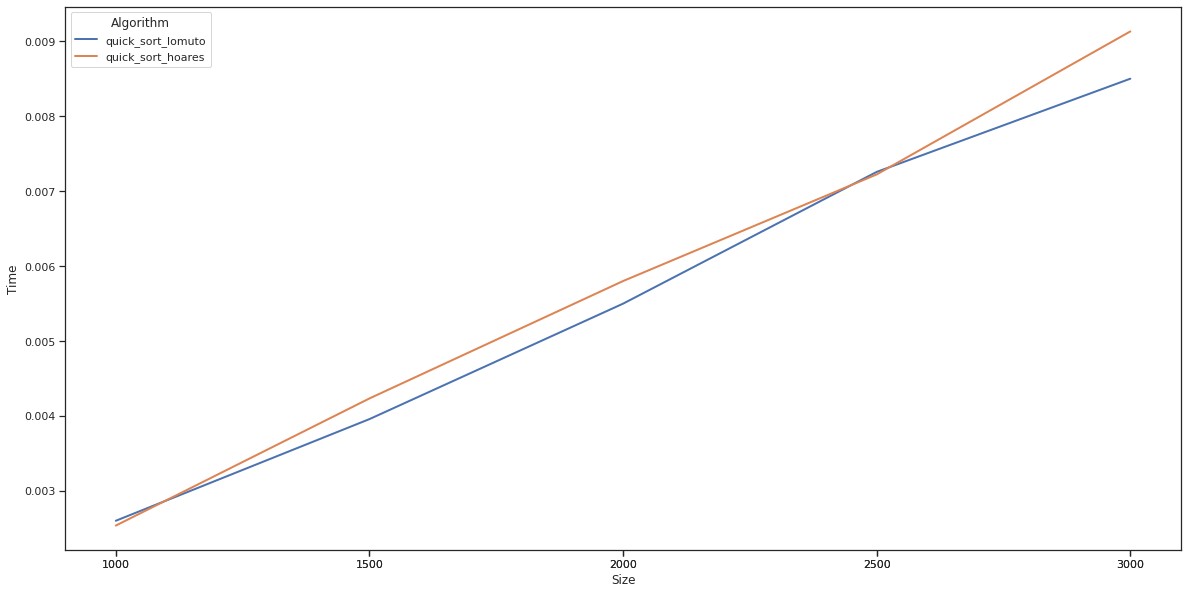

In [110]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()